<a href="https://colab.research.google.com/github/andersonjhones/Analise_de_dados_pandas_DIO/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import plotly.express as px
import matplotlib as m
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,5
from sklearn.preprocessing import LabelEncoder

**Carregando o conjunto de dados do GitHub.**

In [2]:
dataset = 'https://github.com/andersonjhones/Analise_de_dados_pandas_DIO/blob/main/AdventureWorks.xlsx?raw=true'
dados= pd.read_excel(dataset)

**Visualizando as duas primeiras linhas do dataset.**

In [3]:
dados.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


**Observando quais produtos estão contidos no dataset.**

In [4]:
#Produtos contidos no dataset
dados['Produto'].unique()

array(['Adventure Works Laptop15.4W M1548 Red',
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 White",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Black",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Black",
       'Adventure Works Laptop15.4W M1548 Black',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Headphone Adapter for Contoso Phone E130 White'], dtype=object)

**Número de linhas e colunas.**

In [5]:
#Quantidade de linhas e colunas
dados.shape

(904, 16)

**Observando o tipo de dados das colunas.**

In [6]:
#Verificando os tipos de dados
dados.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

**Verificando a receita total obtida pelas lojas nos anos de 2008 e 2009.**

In [7]:
#Qual a Receita total?
print(f'A receita total é: {dados["Valor Venda"].sum():.2f}')

A receita total é: 5984606.14


**Observando a receita anual percebe-se que em 2009 a receita caiu 390610 "reais" (cerca de 12,25 %) em relação à 2008.**

In [8]:
#Receita total anual
print(f'A receita total apresentada nos anos de 2008 e 2009 \n: {dados.groupby(dados["Data Venda"].dt.year)["Valor Venda"].sum()}')

A receita total apresentada nos anos de 2008 e 2009 
: Data Venda
2008    3.187608e+06
2009    2.796998e+06
Name: Valor Venda, dtype: float64


**Custo total dos produtos.**

In [9]:
#Qual o custo Total?
dados["custo"] = dados["Custo Unitário"]*dados["Quantidade"] #Criando a coluna de custo

In [10]:
dados.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [11]:
#Qual o custo Total?
print('O custo total é:', round(dados["custo"].sum(), 2))

O custo total é: 2486783.05


In [12]:
#Agora que temos a receita e custo e o total, podemos achar o Lucro total
#Vamos criar uma coluna de Lucro que será Receita - Custo
dados["lucro"]  = dados["Valor Venda"] - dados["custo"] 

In [13]:
dados.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


**Lucro total**

In [14]:
#Total Lucro
print(f'O lucro total é: {dados["lucro"].sum(): .2f}')

O lucro total é:  3497823.09


**Tempo em dias para envio do produto.**

In [15]:
#Criando uma coluna com total de dias para enviar o produto
dados["Tempo_envio"] = dados["Data Envio"] - dados["Data Venda"]

In [16]:
dados.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


**Agora, queremos saber a média do tempo de envio para cada Marca, e para isso precisamos transformar a coluna Tempo_envio em númerica**

In [17]:
#Extraindo apenas os dias
dados["Tempo_envio"] = (dados["Data Envio"] - dados["Data Venda"]).dt.days

In [ ]:
dados.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [19]:
#Verificando o tipo da coluna Tempo_envio
dados["Tempo_envio"].dtype

dtype('int64')

**Média do tempo de envio por marca.**

In [20]:
#Média do tempo de envio por Marca
dados.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

 **Missing Values**

In [21]:
#Verificando se temos dados faltantes
dados.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [22]:
#Verificando se temos dados faltantes 
dados.isnull().sum().sum() #nenhum dado faltante no dataset

0

**E, se a gente quiser saber o Lucro por Ano e Por Marca?**

In [23]:
#Vamos Agrupar por ano e marca
dados.groupby([dados["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

**Agrupamento o somatório do lucro por ano e loja.**

In [52]:
#Vamos Agrupar por ano e loja
dados.groupby([dados["Data Venda"].dt.year, "ID Loja"])["lucro"].sum().reset_index()

,Data Venda,ID Loja,lucro
0,2008,199,"738,540.81"
1,2008,306,"593,037.44"
2,2008,307,"588,499.47"
3,2009,199,"556,177.71"
4,2009,306,"423,455.69"
5,2009,307,"598,111.99"


**Gráfico do percentual de lucro de cada loja no ano de 2008.**

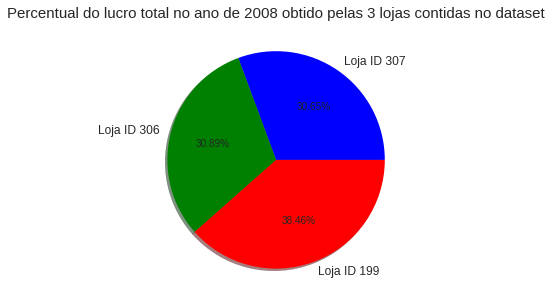

In [59]:
fatias = [588499.47, 593037.44, 738540.81]
labels = ['Loja ID 307', 'Loja ID 306',  'Loja ID 199']
colors = ['blue', 'green', 'red']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual do lucro total no ano de 2008 obtido pelas 3 lojas contidas no dataset', fontsize = 15)
plt.axis("off")
#plt.legend()
plt.show()

**Gráfico do percentual de lucro de cada loja no ano de 2009.**

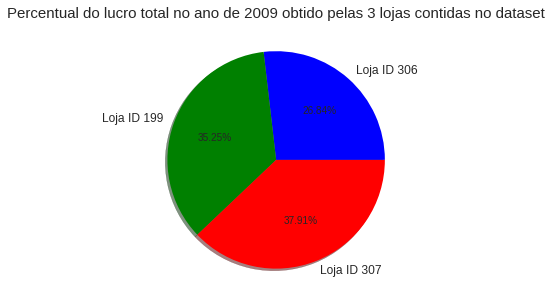

In [60]:
fatias = [423455.69, 556177.71, 598111.99]
labels = ['Loja ID 306', 'Loja ID 199',  'Loja ID 307']
colors = ['blue', 'green', 'red']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual do lucro total no ano de 2009 obtido pelas 3 lojas contidas no dataset', fontsize = 15)
plt.axis("off")
#plt.legend()
plt.show()

**Lucro por data da venda e por marca.**

In [24]:
 pd.options.display.float_format = '{:20,.2f}'.format

In [27]:
#Resetando o index
lucro_ano = dados.groupby([dados["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


**Total de produtos por tipo.**

In [28]:
#Qual o total de produtos vendidos?
dados.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

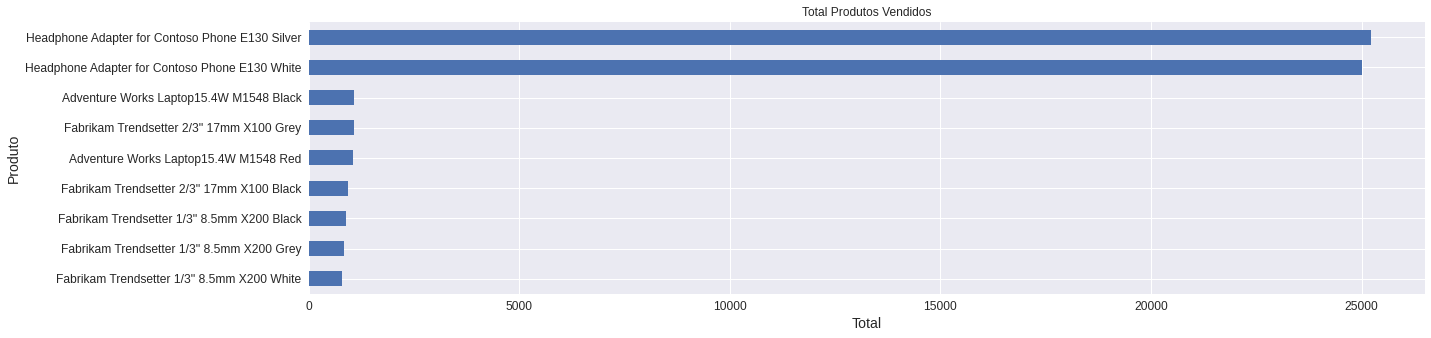

In [29]:
#Gráfico Total de produtos vendidos
dados.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

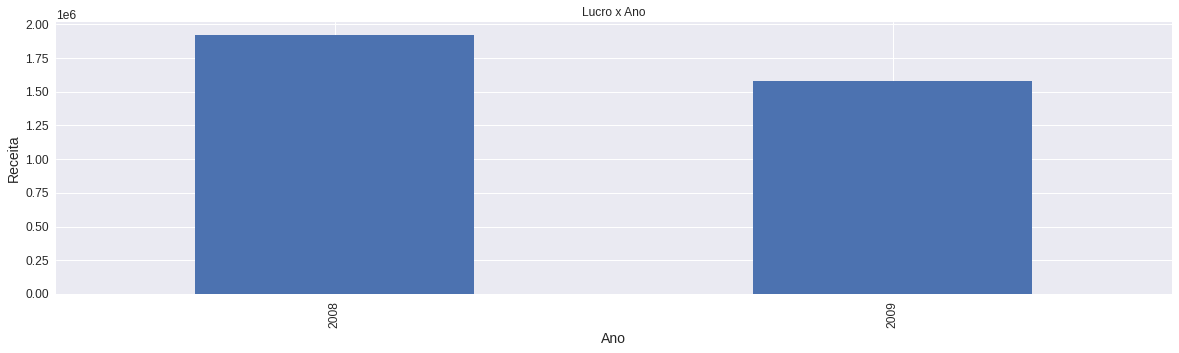

In [30]:
#Lucro por ano total
dados.groupby(dados["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

**Lucro por ano total e por loja.**

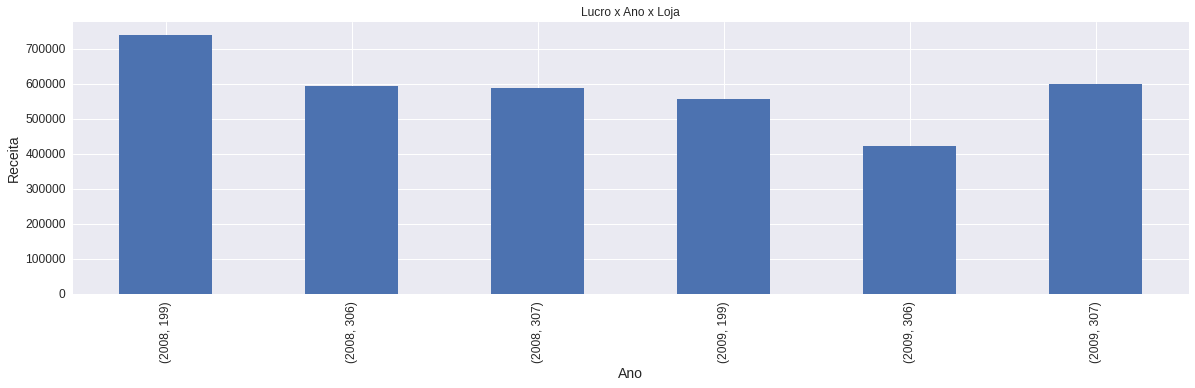

In [61]:
#Lucro por ano total e por loja
dados.groupby([dados["Data Venda"].dt.year, dados['ID Loja']])["lucro"].sum().plot.bar(title="Lucro x Ano x Loja")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [32]:
dados.groupby(dados["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [34]:
#Selecionando apenas as vendas de 2008
dados_2008 = dados[dados["Data Venda"].dt.year == 2008]

In [35]:
#Selecionando apenas as vendas de 2009
dados_2009 = dados[dados["Data Venda"].dt.year == 2009]

In [36]:
dados_2009.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12


**Lucro de vendas no ano de 2008.**

Percebe-se que o lucro das vendas em 2008 teve tendências de alta e de baixa. Começando com uma tendência de alta de Janeiro para fevereiro, uma queda para o mês seguinte, uma leve alta de março para abril, mas com uma tendência de alta muito forte de alta de abril até junho, que teve uma quedaa até o mês 8. No gráfico pode-se obervar várias tendẽncias de alta e de baixa.

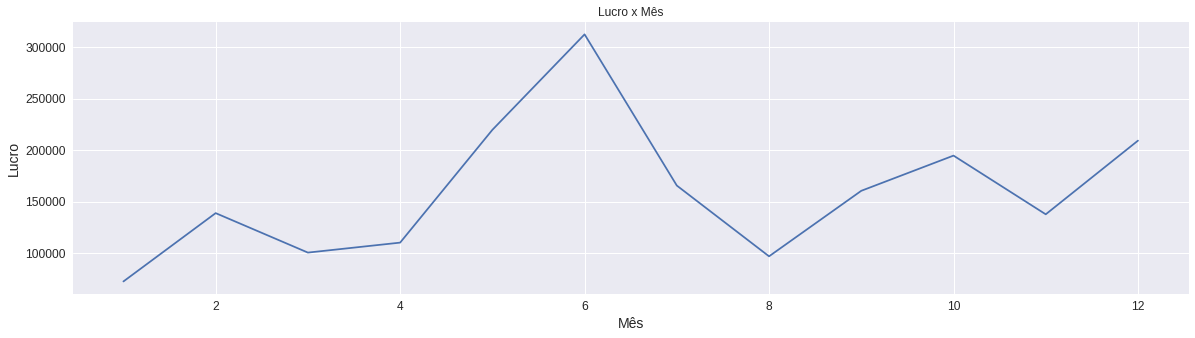

In [37]:
dados_2008.groupby(dados_2008["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

**Lucro de vendas no ano de 2009.**

No ano de 2009 pode-se perceber novamente muitas tendências de alta e de baixa durante os meses e uma certa sazonalidade se comparado com o ano anterior, porém, como são só dois anos analisados, não pode-se afirmar que o lucro seguiria um comportamento sazonal nos próximos anos por vários fatores, dentre eles até causas aleatórias como fenômenos da natureza, mudança no estilo de vendas se presencial, online, etc, por exemplo.

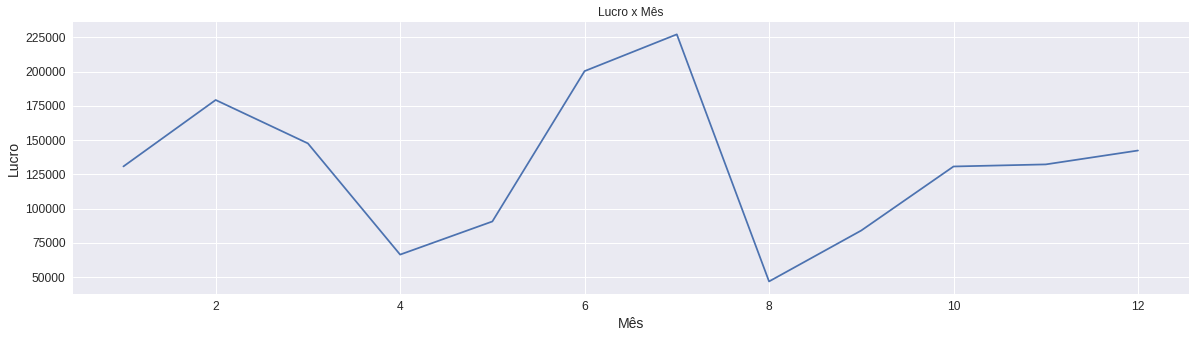

In [38]:
dados_2009.groupby(dados_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

In [62]:
dados_2008['Marca'].value_counts()

Fabrikam           286
Adventure Works    103
Contoso             80
Name: Marca, dtype: int64

**Agrupando o lucro por marca em 2008.**

A marca Fabrikam foi a que retornou mais lucro e também foi a marca mais vendida, com cerca de 61% das vendas contidas no dataset em relação à 2008.

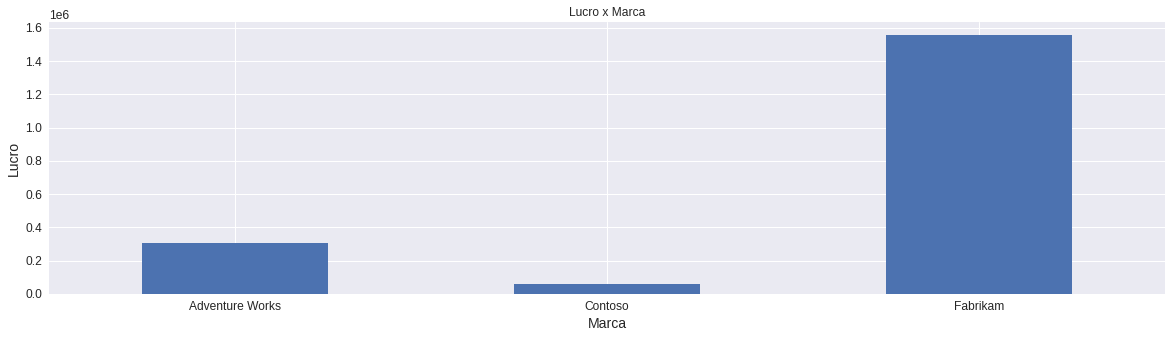

In [39]:
dados_2008.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [63]:
dados_2009['Marca'].value_counts()

Fabrikam           208
Adventure Works    135
Contoso             92
Name: Marca, dtype: int64

In [73]:
dados_2009['Valor Venda'][dados_2009['Marca']=='Fabrikam'].mean()

7904.079759615385

In [74]:
dados_2009['custo'][dados_2009['Marca']=='Fabrikam'].mean()

2932.4867307692307

In [71]:
dados_2009['Valor Venda'][dados_2009['Marca']=='Adventure Works'].mean()

6173.713481481482

In [75]:
dados_2009['custo'][dados_2009['Marca']=='Adventure Works'].mean()

3170.7869629629636

In [72]:
dados_2009['Valor Venda'][dados_2009['Marca']=='Contoso'].mean()

3472.8106695652177

In [76]:
dados_2009['custo'][dados_2009['Marca']=='Contoso'].mean()

1969.9959782608694

**Agrupando o lucro por marca em 2009.**

A marca Fabrikam foi a que retornou mais lucro e também foi a marca mais vendida, com cerca de 48% das vendas contidas no dataset em relação à 2009.

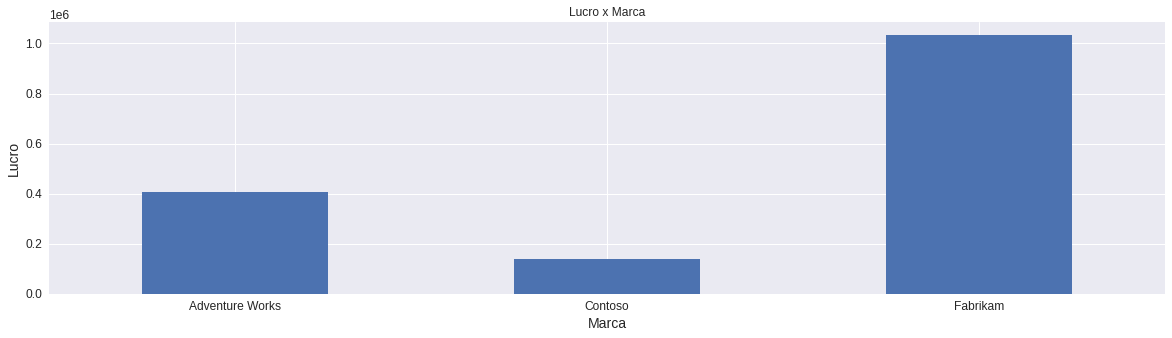

In [40]:
dados_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

**A classe regular foi a que retornou mais lucro.**

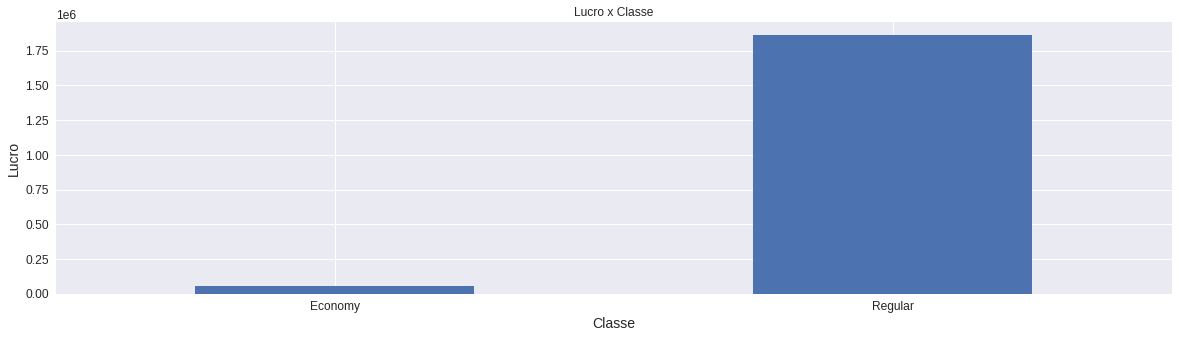

In [41]:
dados_2008.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

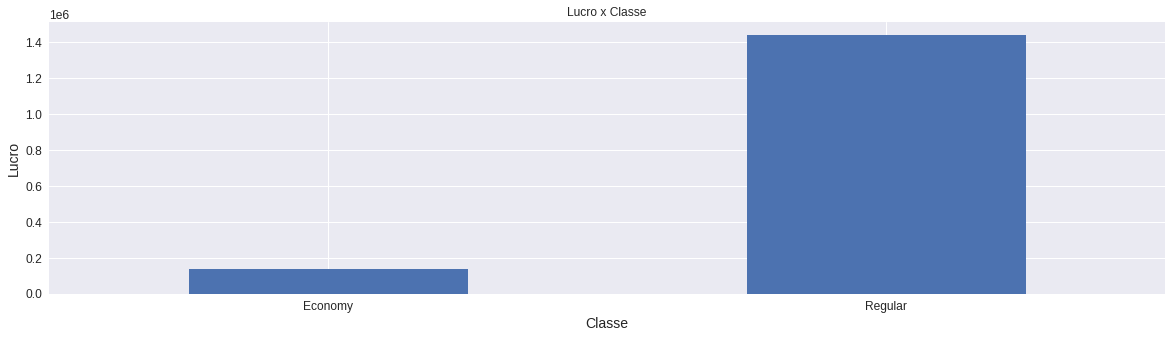

In [42]:
dados_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

**Tempo de envio do produto em dias.**

 A média de entrega dos produtos é 8,54 dias, mas a mediana é 9 dias, ou seja, 50% dos produtos são entregues em até 9 dias. O mínimo de tempo em dias que um produto leva para ser entregue são 4 dias, 25% dos produtos sãao entregues com mais de 11 dias e o máximo de dias que um produto leva para ser entregue são 20 dias.

In [43]:
dados["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

**Gráfico de boxplot interativo do tempo de envio em dias dos produtos.**

In [44]:
# Gráfico de Boxplot do tempo de envio do produto
grafico = px.box(dados, y = 'Tempo_envio')
grafico.show()

**Histograma mostrando as ocorrências das entregas dos produtos em dias.** 

In [45]:
fig = px.histogram(dados, x="Tempo_envio",
                         hover_data=dados.columns)
fig.show()

In [46]:
#Tempo mínimo de envio
dados["Tempo_envio"].min()

4

In [47]:
#Tempo máximo de envio
dados['Tempo_envio'].max()

20

In [48]:
#Identificando o Outlier
dados[dados["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [49]:
dados['ID Loja'].nunique()

3

**Observando a média e a mediana do tempo de envio por loja, pode-se concluir que a loja que levou mais tempo para entregar os produtos foi a loja 307. A loja 199 teve um caso de tempo de envio do produto que levou 20 dias, mas foi um caso isolado (um outilier).**

In [78]:
dados.groupby(dados["ID Loja"])["Tempo_envio"].max()

ID Loja
199    20
306    13
307    13
Name: Tempo_envio, dtype: int64

In [79]:
dados.groupby(dados["ID Loja"])["Tempo_envio"].min()

ID Loja
199    4
306    4
307    4
Name: Tempo_envio, dtype: int64

In [77]:
dados.groupby(dados["ID Loja"])["Tempo_envio"].mean()

ID Loja
199                   8.56
306                   7.96
307                   9.03
Name: Tempo_envio, dtype: float64

In [50]:
dados.groupby(dados["ID Loja"])["Tempo_envio"].median()

ID Loja
199                   9.00
306                   8.00
307                  10.00
Name: Tempo_envio, dtype: float64

In [ ]:
dados.to_csv("df_vendas_novo.csv", index=False)